In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [114]:
fname_source = 'backup_2022-06-08_10_18_43'

In [115]:
df = pd.read_csv(f'csv_backups/{fname_source}.csv')

In [116]:
df['played_at'] = pd.to_datetime(df['played_at'])

In [117]:
def print_screenshot(q,fname):
    # resource: https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
    fig, ax = plt.subplots(figsize=(17, 5))
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    ax.table(cellText=q.values, colLabels=q.columns, loc='center', fontsize=30.0)
    fig.tight_layout()
    #plt.show()
    plt.savefig(fname)

In [118]:
# create directory
try: 
    #screendir = f"screenshots/{df.played_at.iloc[-1].date().strftime('%Y-%m-%d')}_{df.played_at.iloc[0].date().strftime('%Y-%m-%d')}"
    screendir = f"screenshots/{fname_source}"
    os.mkdir(screendir) 
except OSError as error: 
    print(error)  

[Errno 17] File exists: 'screenshots/backup_2022-06-08_10_18_43'


/var/folders/ld/34q4wj957qjd4jv_tkgnfd_w0000gn/T/ipykernel_11689/1024143537.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(17, 5))


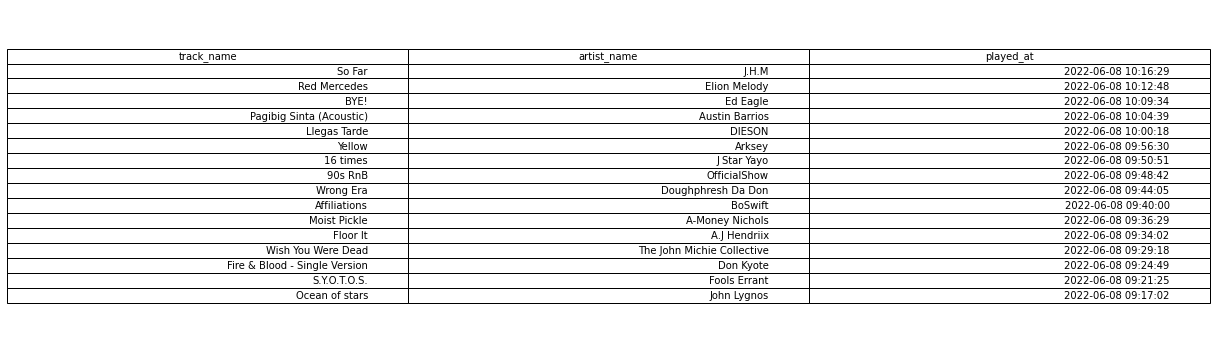

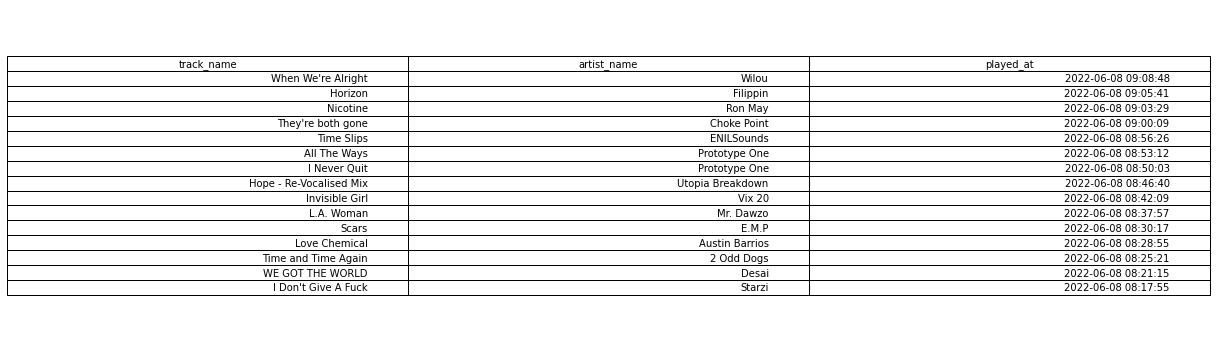

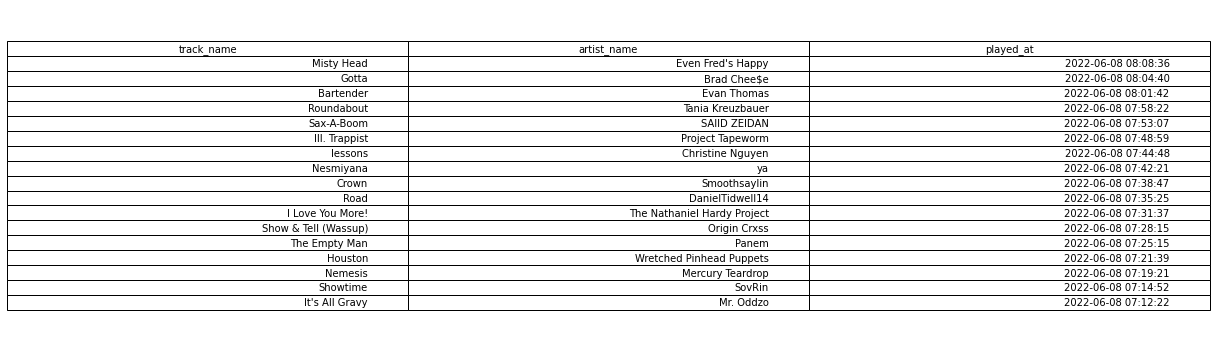

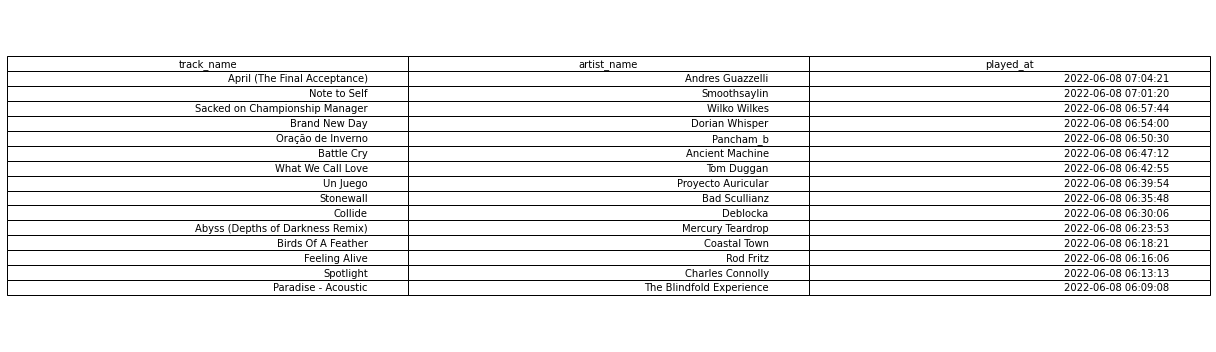

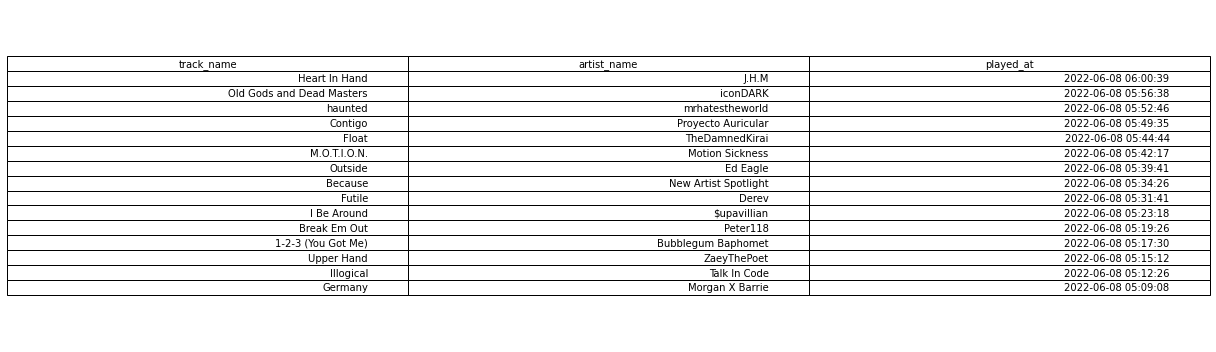

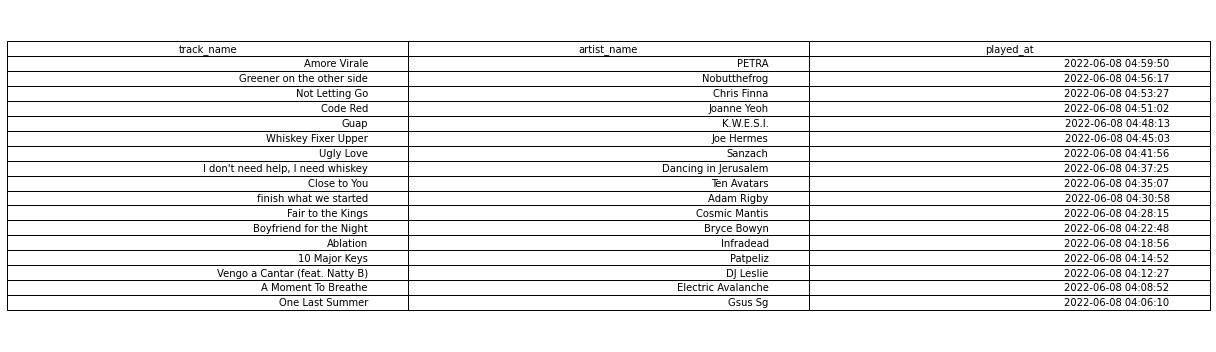

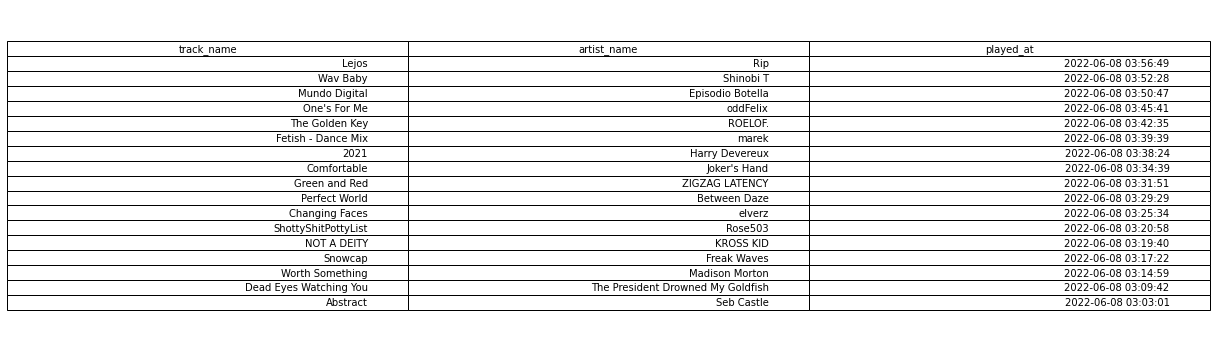

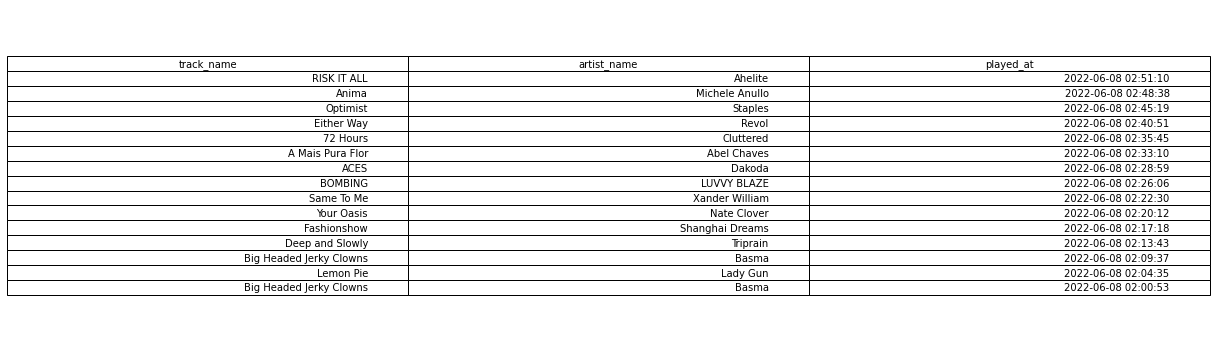

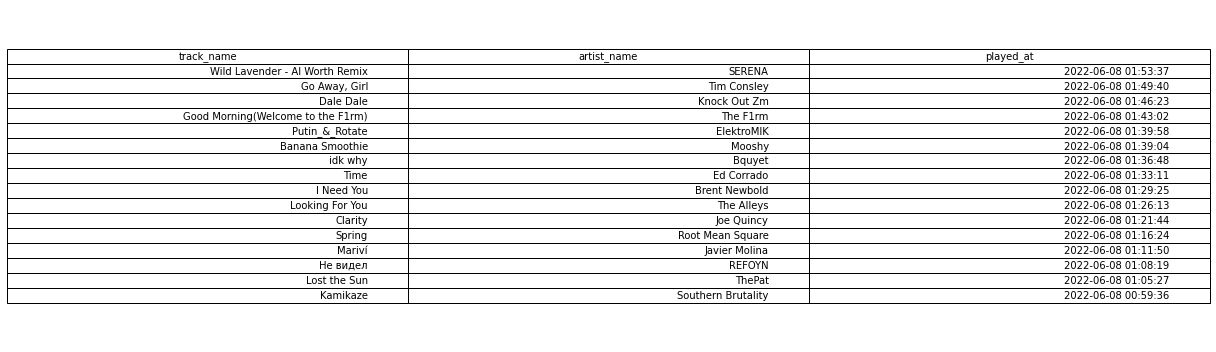

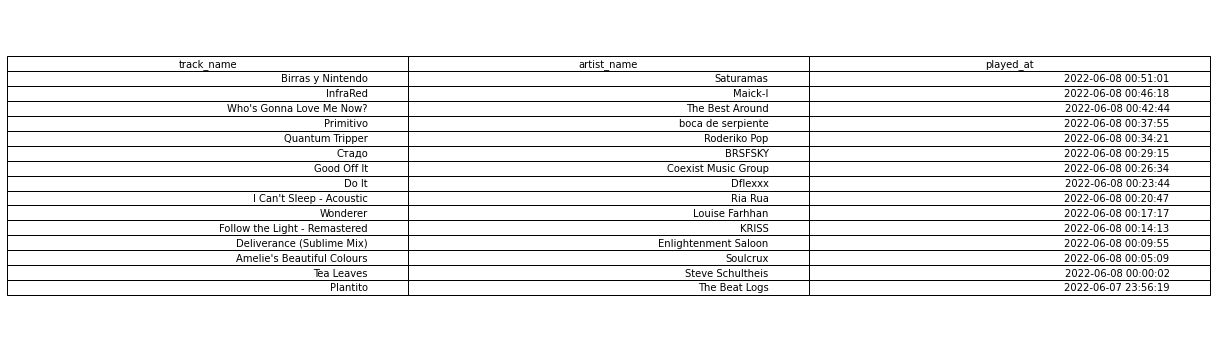

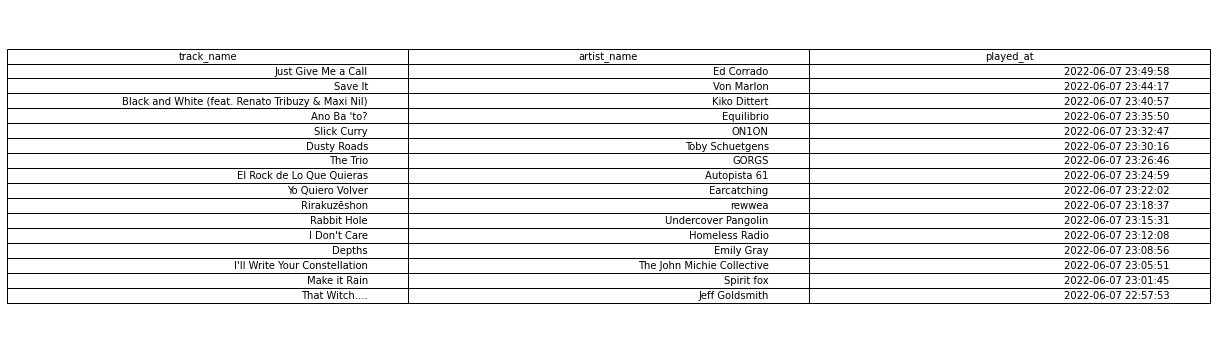

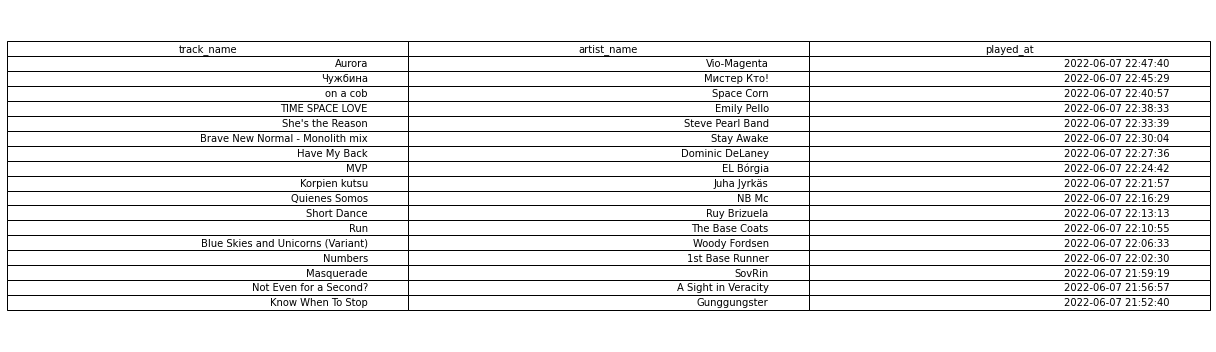

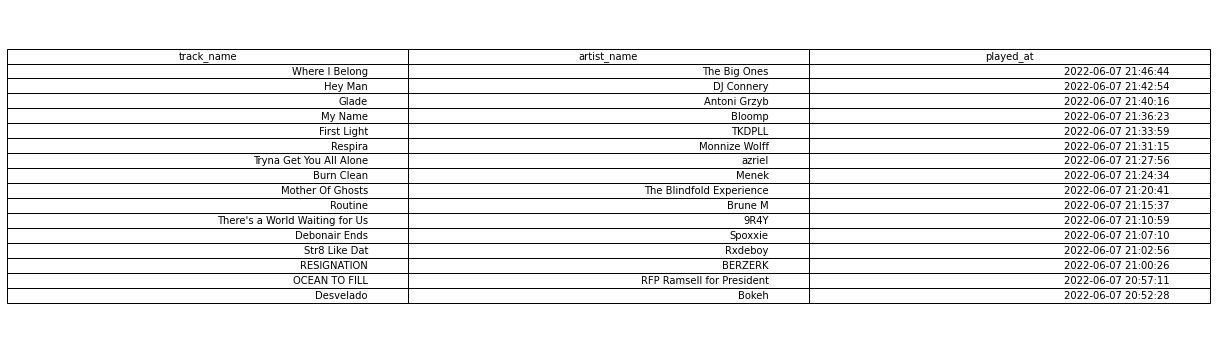

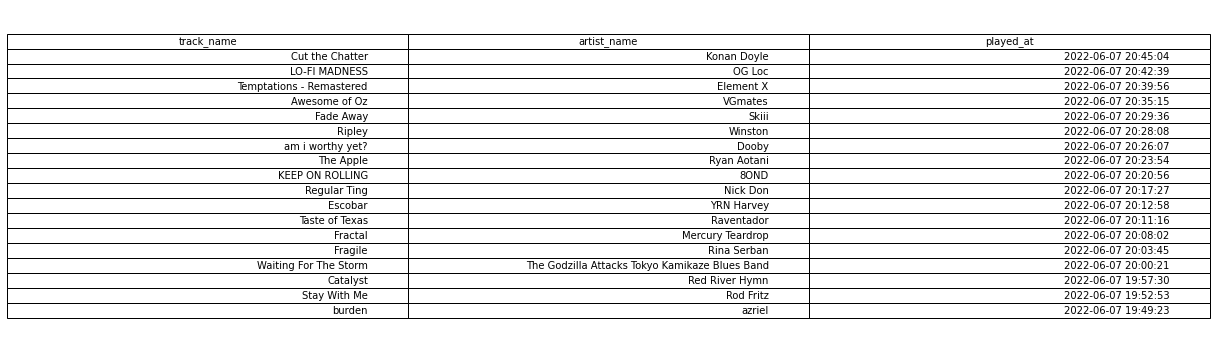

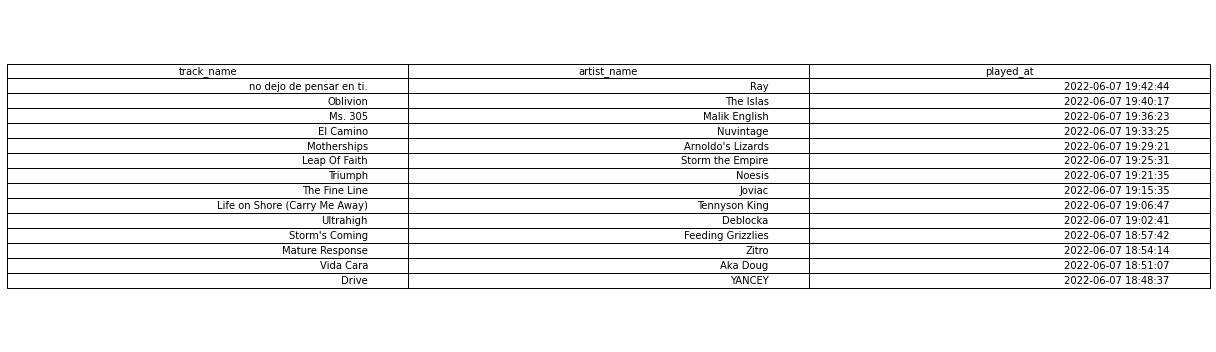

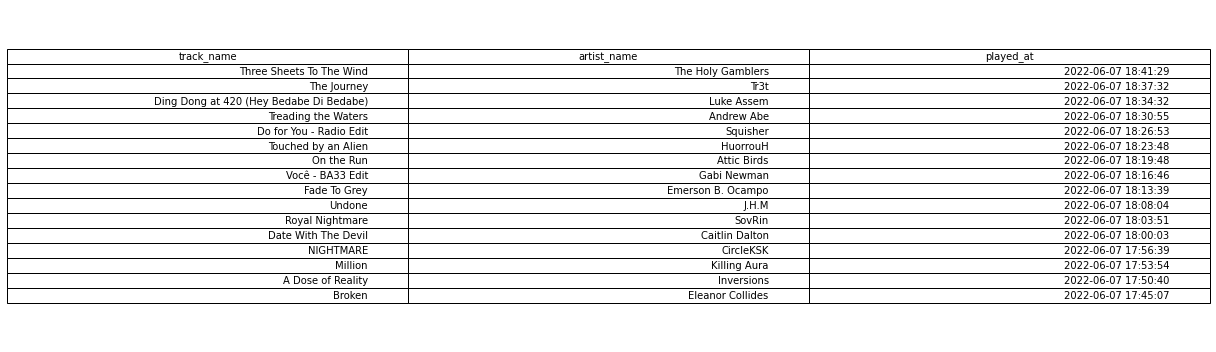

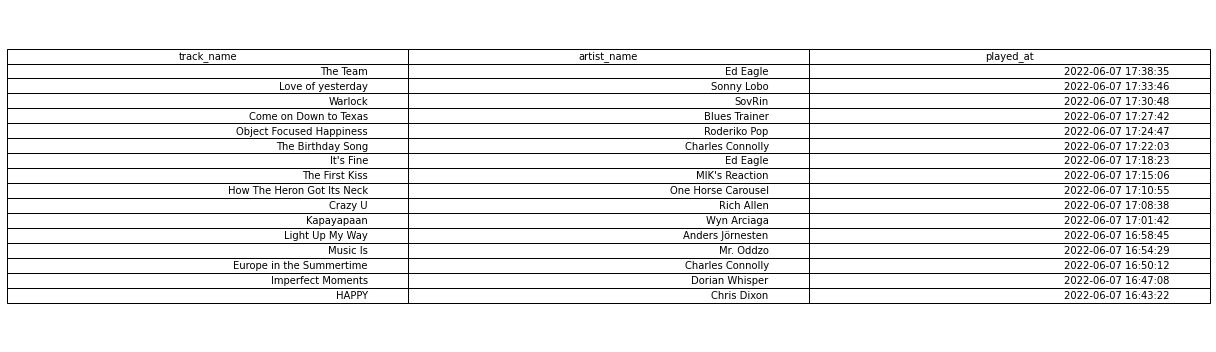

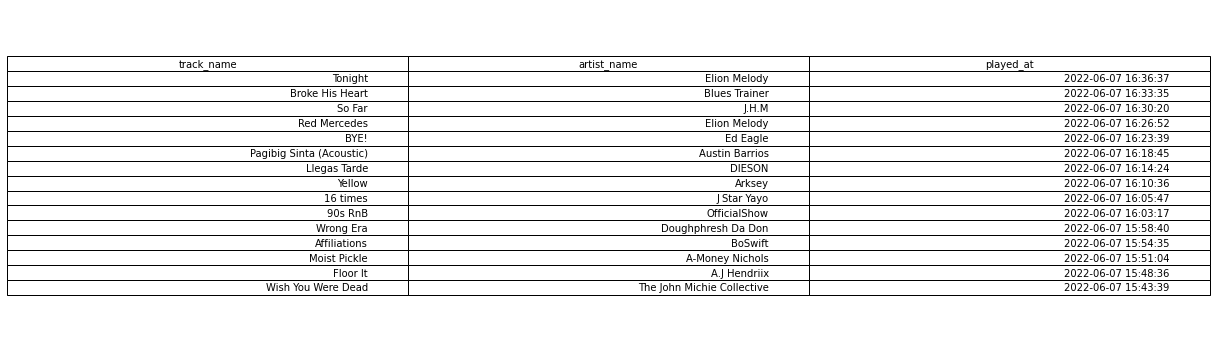

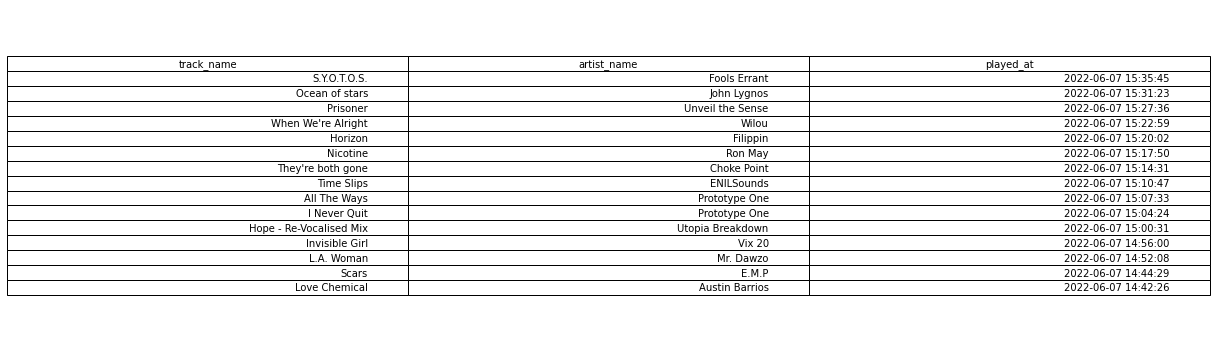

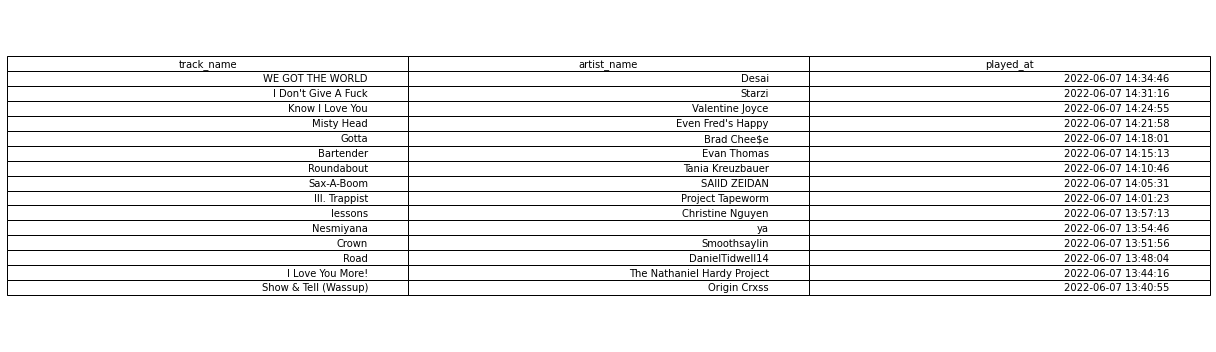

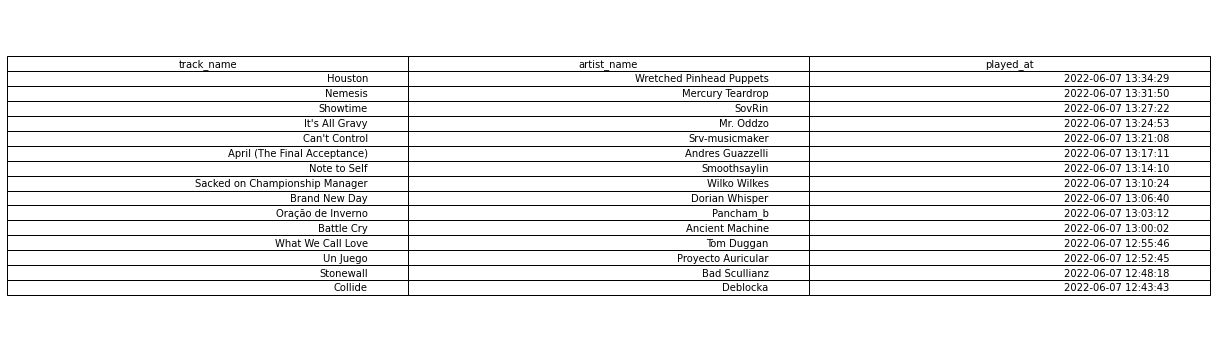

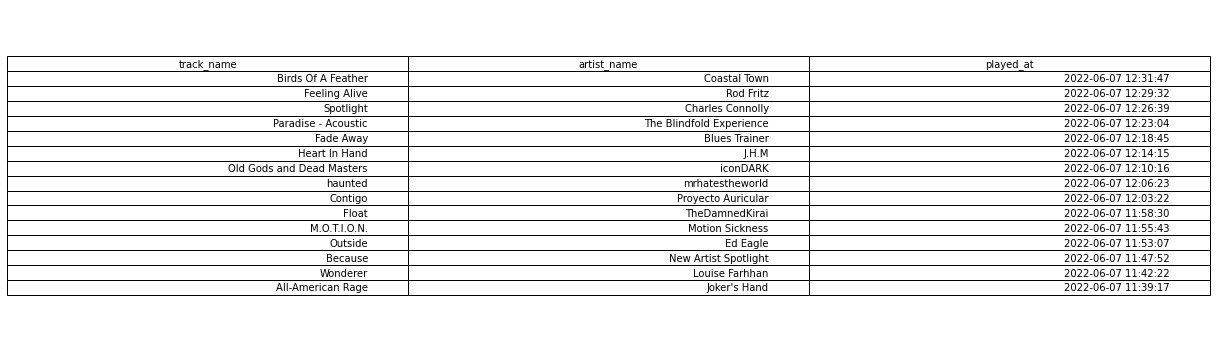

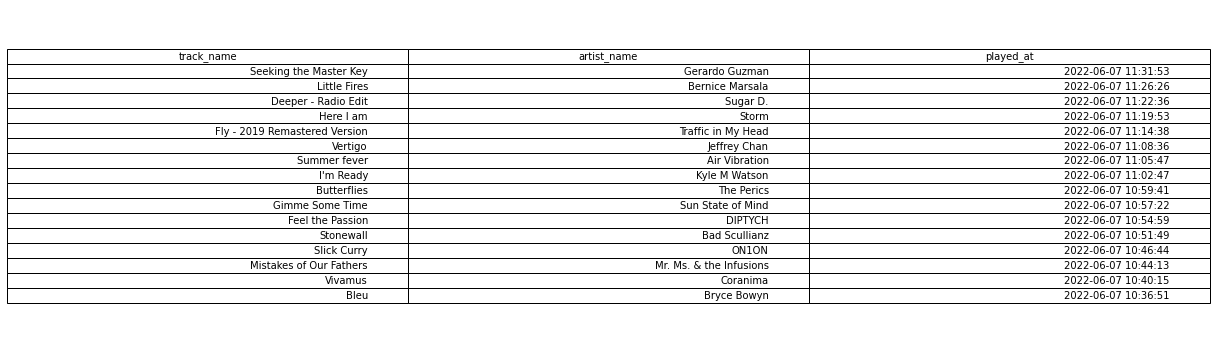

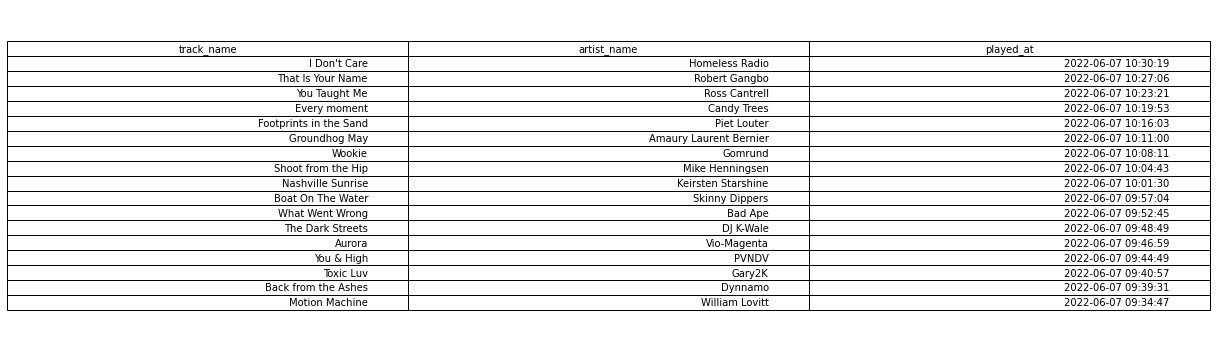

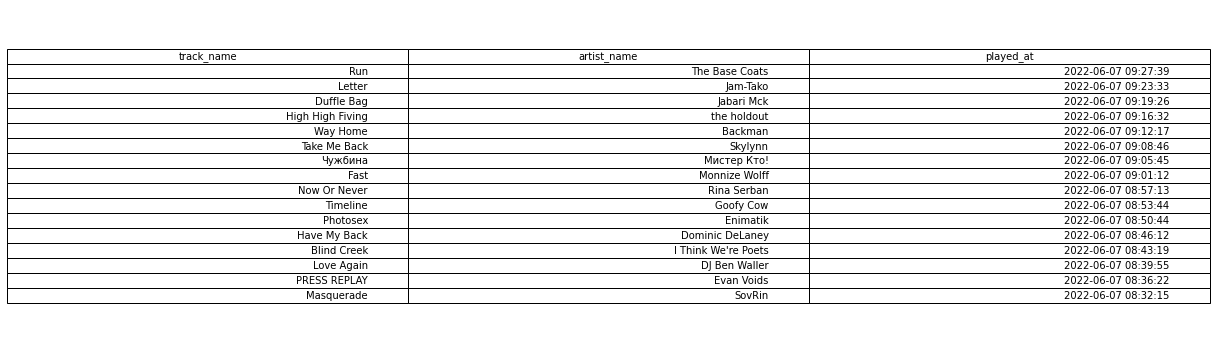

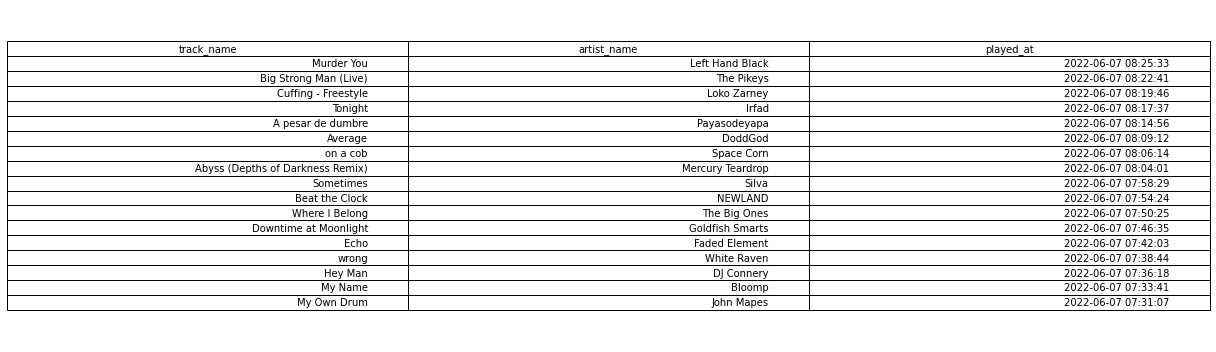

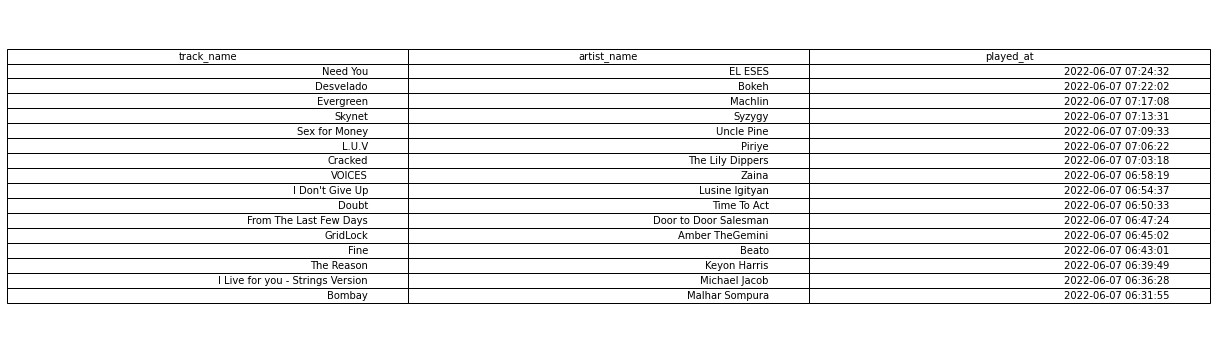

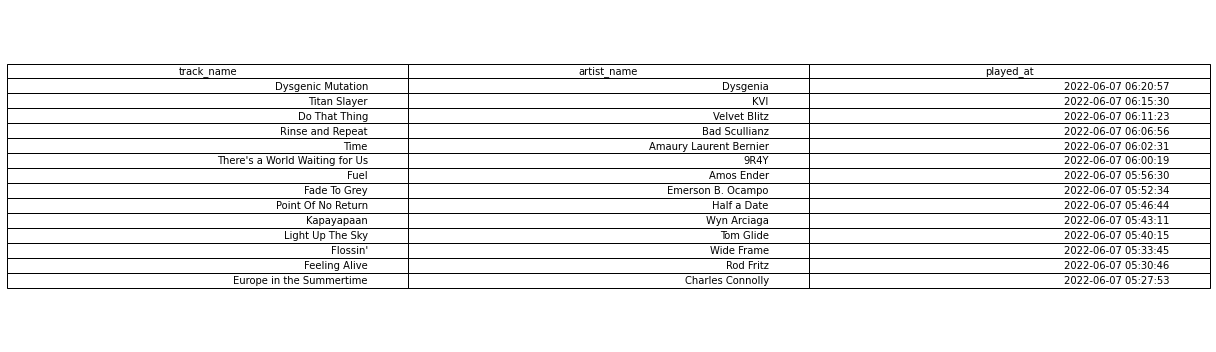

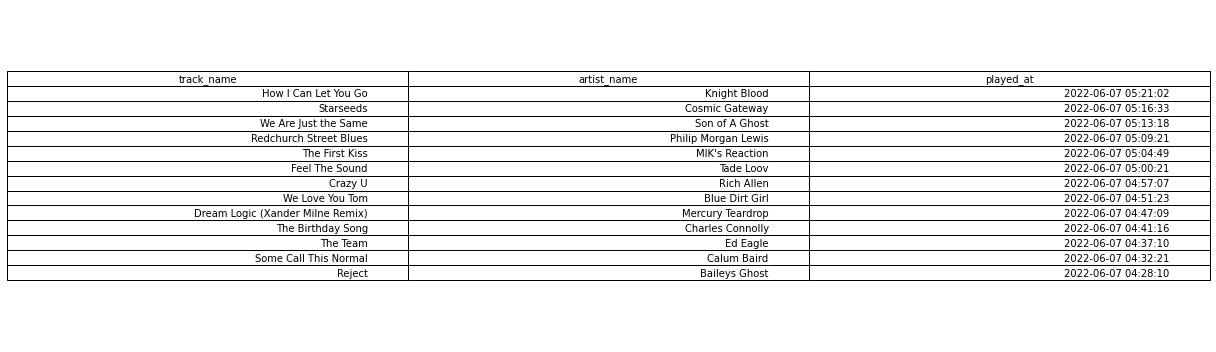

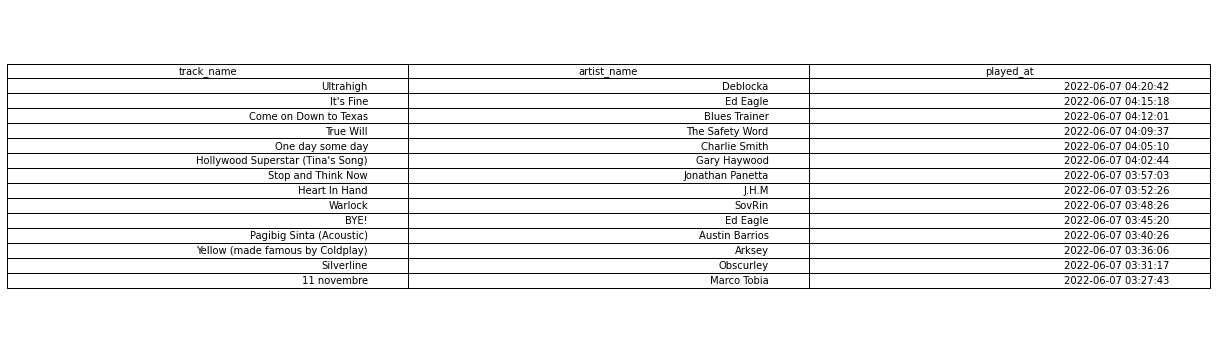

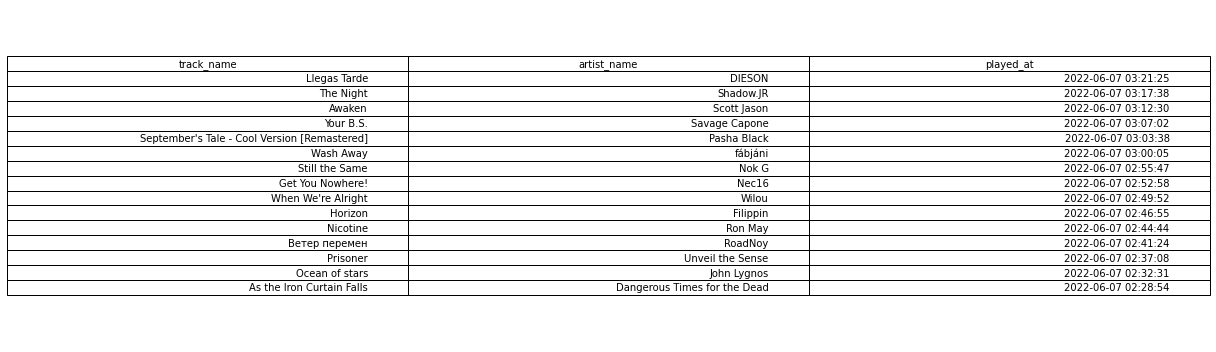

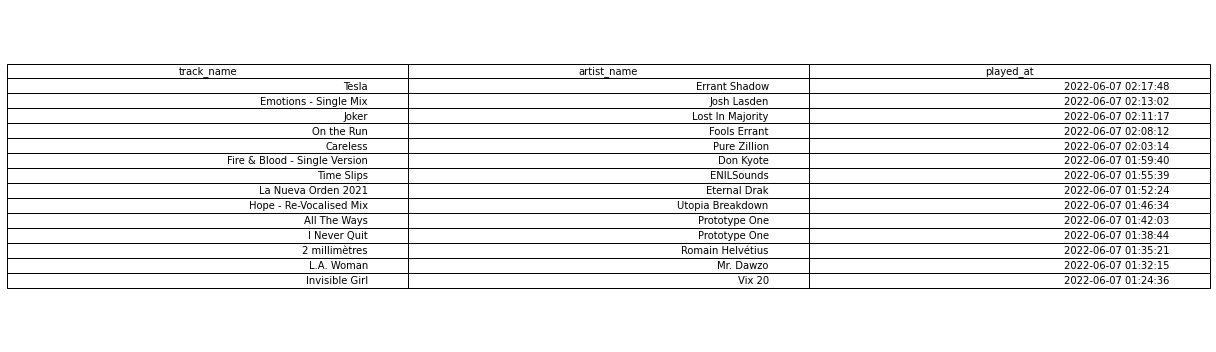

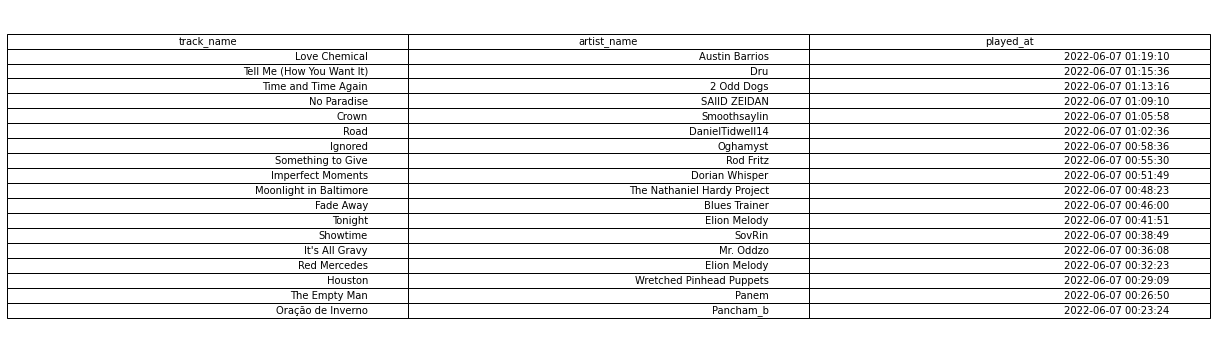

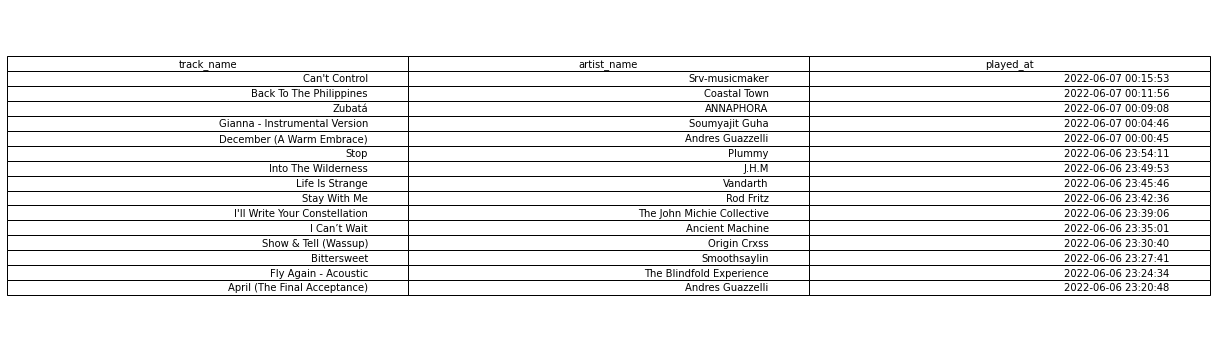

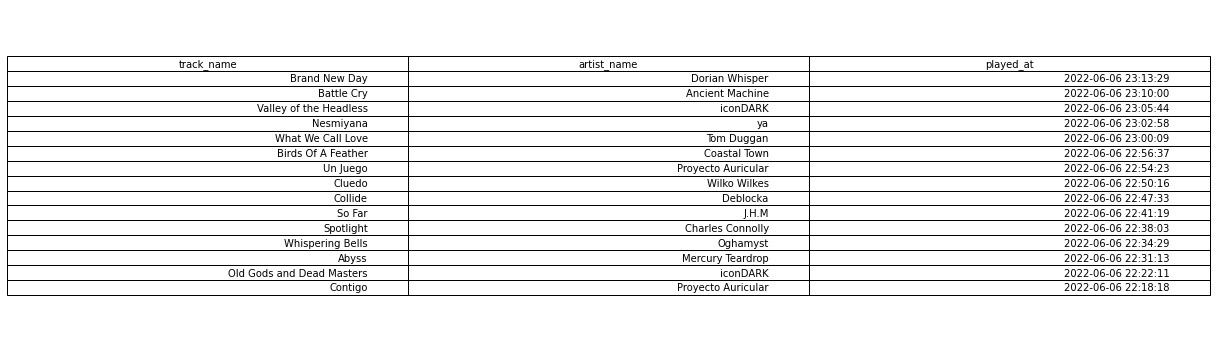

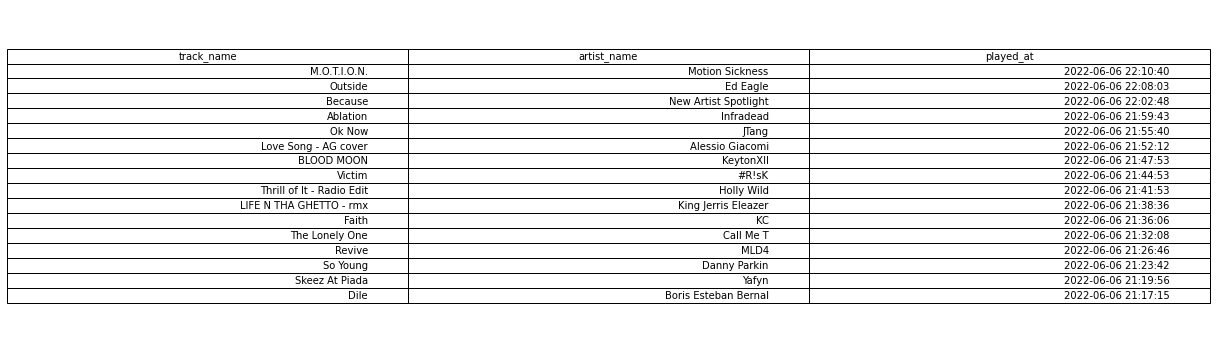

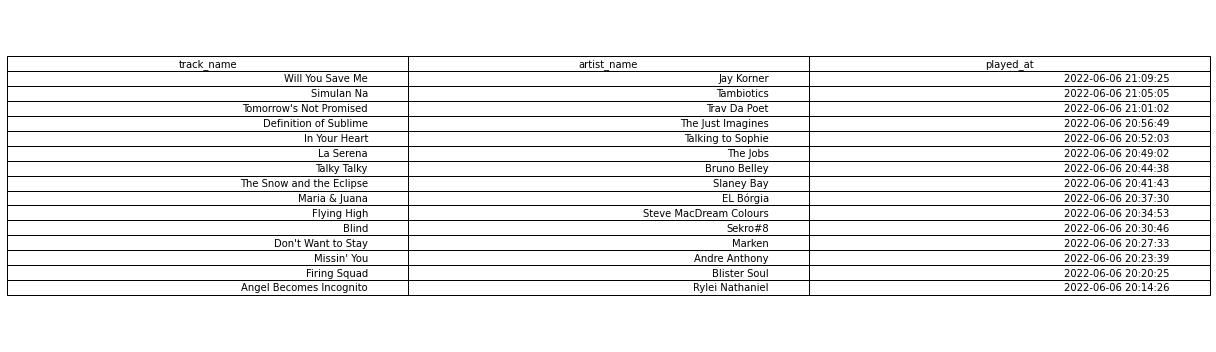

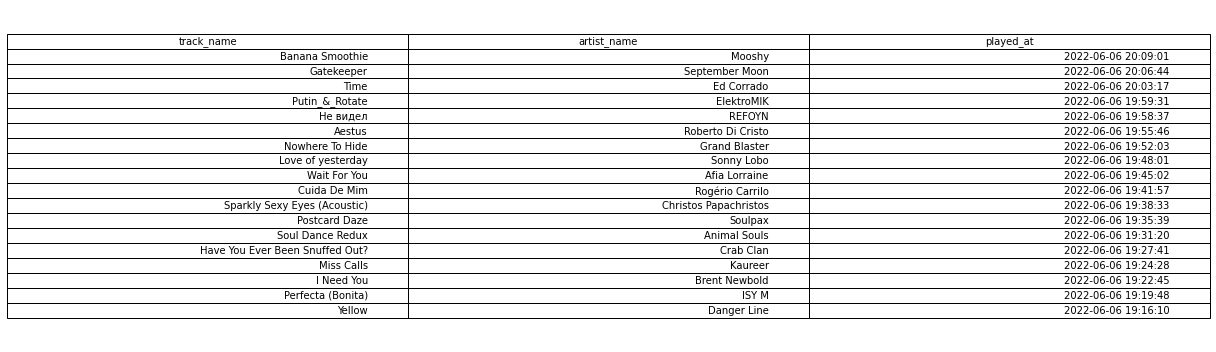

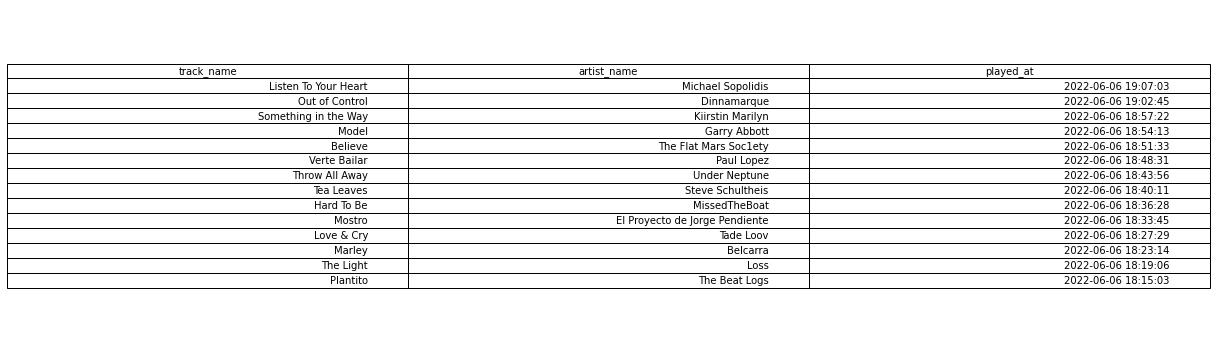

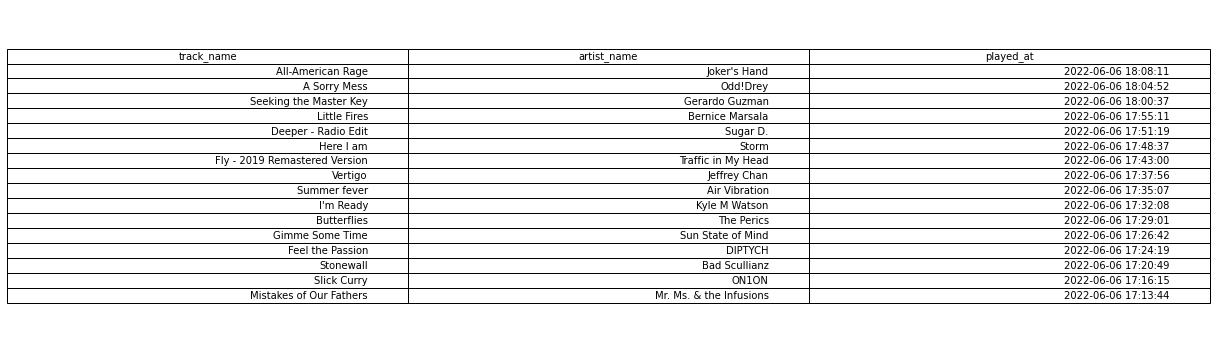

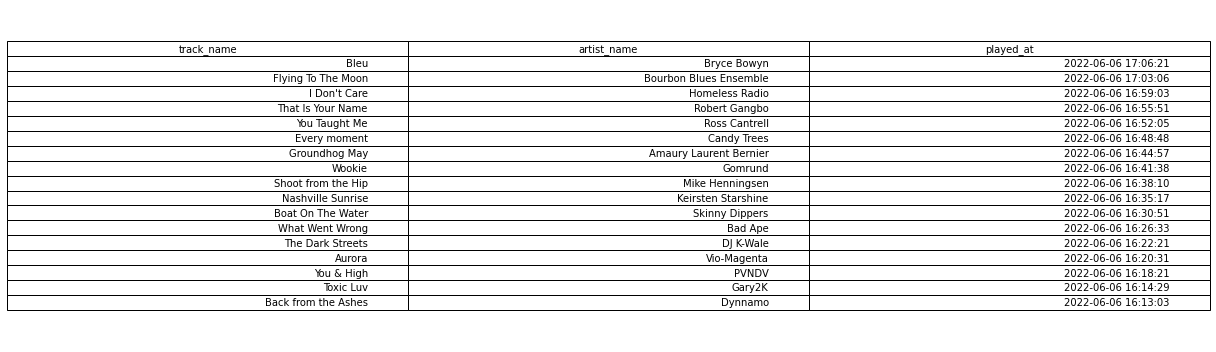

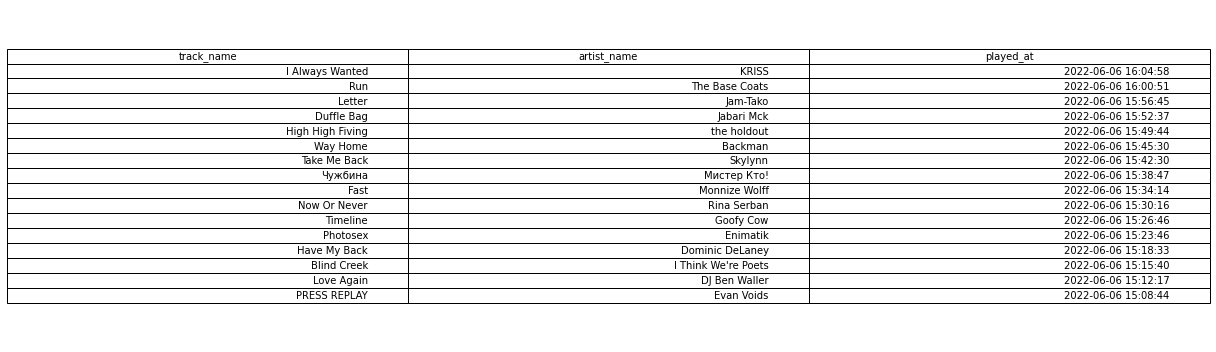

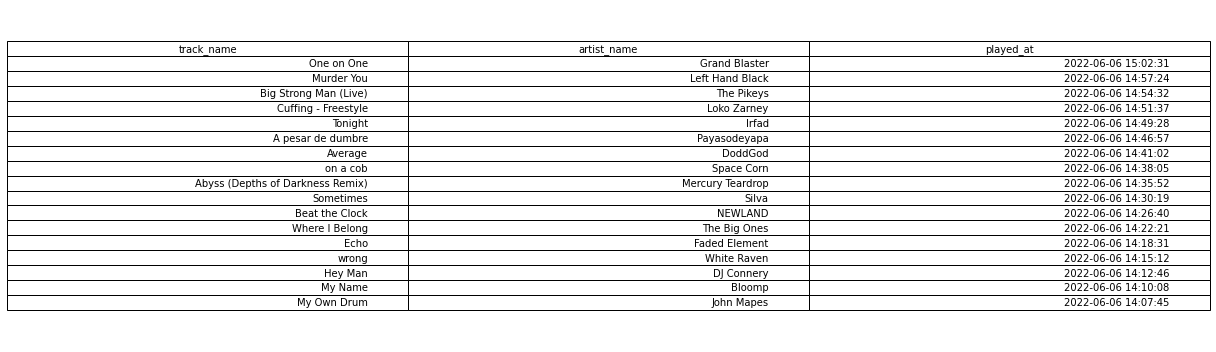

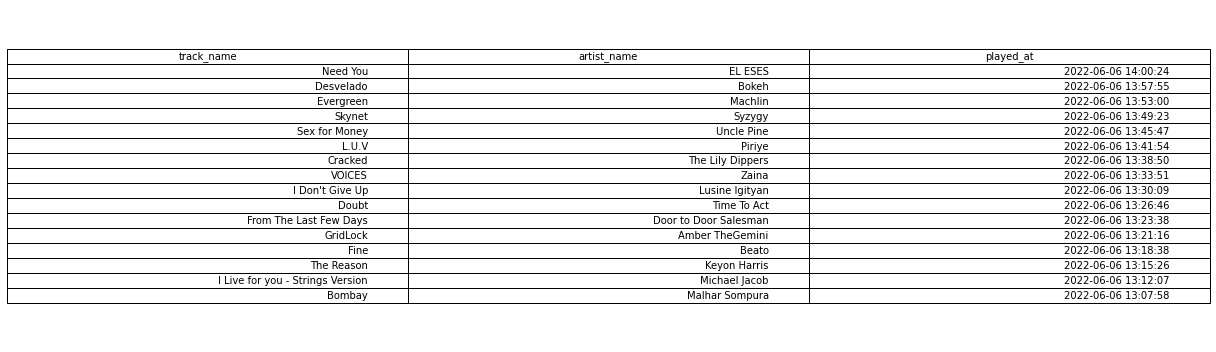

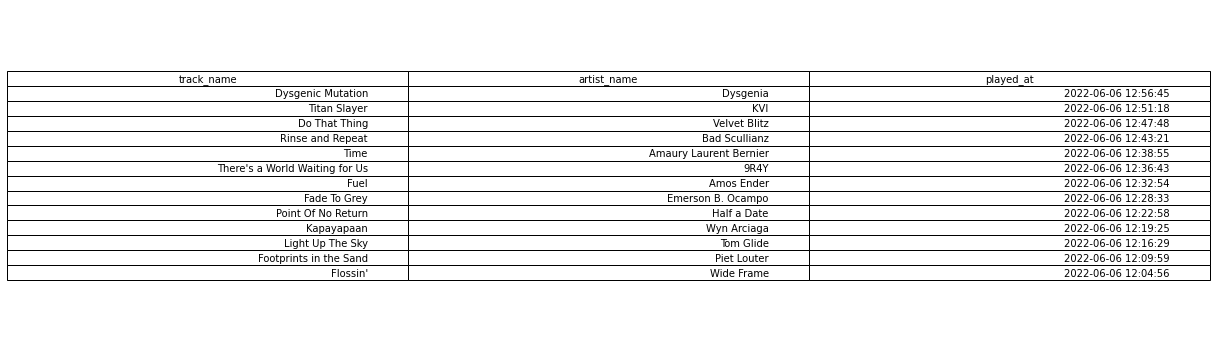

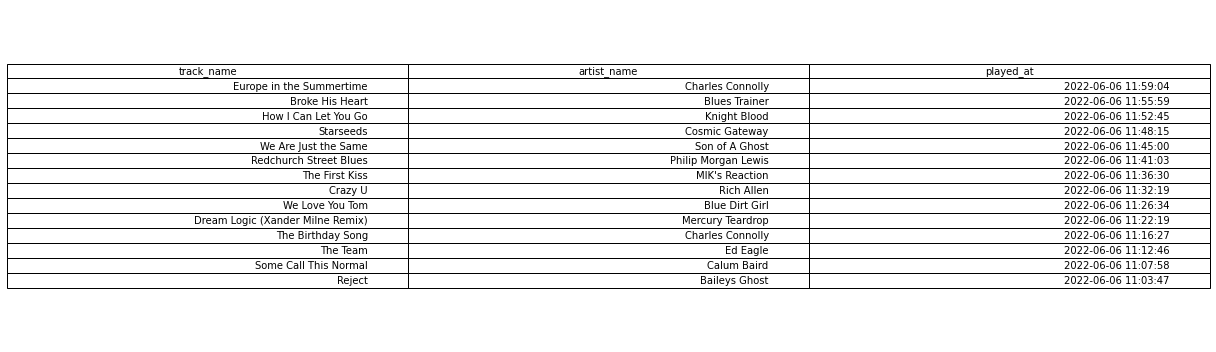

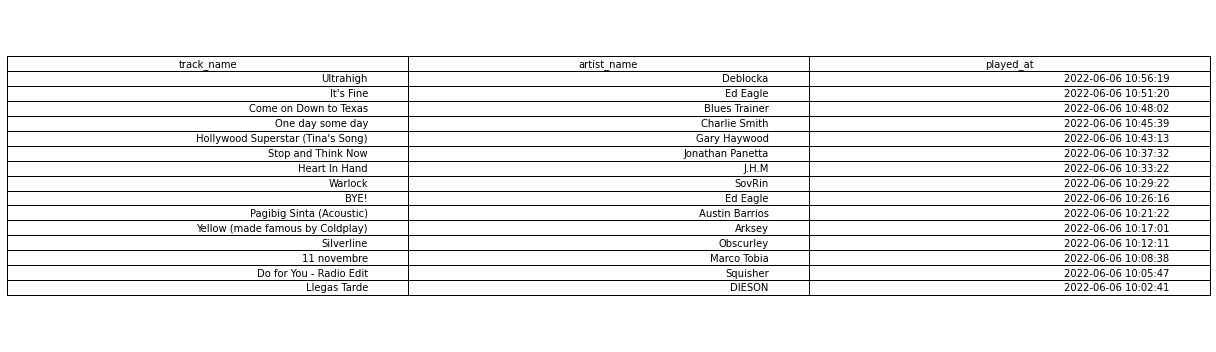

In [119]:
played_at = df.loc[0,'played_at']
last_idx = 0
image_counter = 0
for i in range(len(df)):
    p2 = df.loc[i,'played_at']
    hours_since_last = (played_at - p2).seconds/3600
    if hours_since_last > 1: 
        # print screenshot and update played_at 
        q = df.iloc[last_idx:i][['track_name','artist_name','played_at']]
        fname = f"{screendir}/{image_counter}.png"
        print_screenshot(q,fname)
                    
        played_at = p2
        last_idx = i+1
        image_counter = image_counter + 1